### Hier komt wat testcode te staan die gebruikt kan worden in het project


In [3]:
#testing API calls
# https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData
# https://support.kraken.com/hc/en-us/articles/4462673939220-REST-API-indicator-based-trading-bot-Python-
import requests

resp = requests.get('https://api.kraken.com/0/public/AssetPairs?pair=BTCEUR')

print(resp.json())

{'error': [], 'result': {'XXBTZEUR': {'altname': 'XBTEUR', 'wsname': 'XBT/EUR', 'aclass_base': 'currency', 'base': 'XXBT', 'aclass_quote': 'currency', 'quote': 'ZEUR', 'lot': 'unit', 'cost_decimals': 5, 'pair_decimals': 1, 'lot_decimals': 8, 'lot_multiplier': 1, 'leverage_buy': [2, 3, 4, 5], 'leverage_sell': [2, 3, 4, 5], 'fees': [[0, 0.26], [50000, 0.24], [100000, 0.22], [250000, 0.2], [500000, 0.18], [1000000, 0.16], [2500000, 0.14], [5000000, 0.12], [10000000, 0.1]], 'fees_maker': [[0, 0.16], [50000, 0.14], [100000, 0.12], [250000, 0.1], [500000, 0.08], [1000000, 0.06], [2500000, 0.04], [5000000, 0.02], [10000000, 0.0]], 'fee_volume_currency': 'ZUSD', 'margin_call': 80, 'margin_stop': 40, 'ordermin': '0.0001', 'costmin': '0.45', 'tick_size': '0.1', 'status': 'online', 'long_position_limit': 200, 'short_position_limit': 120}}}


In [5]:
#candles van laatste 12 uur
import requests

resp = requests.get('https://api.kraken.com/0/public/OHLC?pair=XBTEUR')

print(resp.json())

{'error': [], 'result': {'XXBTZEUR': [[1672704300, '15591.5', '15593.4', '15591.5', '15593.4', '15592.0', '0.02299246', 3], [1672704360, '15593.6', '15595.0', '15593.6', '15595.0', '15594.1', '0.01783059', 3], [1672704420, '15595.0', '15595.0', '15594.9', '15595.0', '15594.9', '0.03954808', 6], [1672704480, '15594.9', '15595.0', '15594.9', '15595.0', '15594.9', '0.07902731', 4], [1672704540, '15595.0', '15595.0', '15594.9', '15594.9', '15594.9', '0.07817923', 8], [1672704600, '15595.0', '15599.7', '15595.0', '15596.2', '15597.4', '0.03566262', 8], [1672704660, '15598.1', '15599.5', '15596.6', '15599.4', '15597.0', '0.26531328', 7], [1672704720, '15599.2', '15599.8', '15597.8', '15599.8', '15599.4', '0.27673293', 11], [1672704780, '15599.8', '15601.2', '15599.7', '15600.2', '15599.8', '0.28033247', 17], [1672704840, '15601.0', '15604.1', '15601.0', '15601.4', '15601.5', '0.00704911', 3], [1672704900, '15604.3', '15608.2', '15604.3', '15607.8', '15607.2', '0.00466741', 5], [1672704960, '

In [8]:
#historical data loop
# 1451602801 unix --> 2016/01/01 00:00:01
# api kan 720 calls ophalen dus per minuut = 12 uur na unix tijd haalt hij op
# 1451646001 = 2016/01/01 12:00:01
# 1451646001 - 1451602801 = 43200 seconden = 12 uur
# dus iedere interval apu call 43200 seconden omhoog om volgende 12 uur te krijgen om op te trainen

import requests
import time
import datetime

# unix time
starttime = 1451602801

for i in range(5):
    req = 'https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=' + str(starttime)
    resp = requests.get(req)
    print(req)
    print(resp.json()['result']['XXBTZEUR'][0])
    time.sleep(1)
    starttime = starttime + 43200


https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1451602801
[1672705260, '15612.2', '15612.2', '15612.1', '15612.1', '15612.1', '0.00067266', 2]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1451646001
[1672705260, '15612.2', '15612.2', '15612.1', '15612.1', '15612.1', '0.00067266', 2]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1451689201
[1672705260, '15612.2', '15612.2', '15612.1', '15612.1', '15612.1', '0.00067266', 2]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1451732401
[1672705260, '15612.2', '15612.2', '15612.1', '15612.1', '15612.1', '0.00067266', 2]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1451775601
[1672705260, '15612.2', '15612.2', '15612.1', '15612.1', '15612.1', '0.00067266', 2]


In [9]:
# kraken get request 2021-07-07 15:00:00
# https://api.kraken.com/0/public/OHLC?pair=XBTEUR&interval=1&since=1625660801


https://api.kraken.com/0/public/OHLC?pair=XBTEUR&since=1451602801
[1672705440, '15610.9', '15610.9', '15610.8', '15610.9', '15610.8', '0.09653545', 6]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&since=1451646001
[1672705440, '15610.9', '15610.9', '15610.8', '15610.9', '15610.8', '0.09653545', 6]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&since=1451689201
[1672705500, '15610.0', '15610.1', '15609.5', '15609.5', '15610.0', '0.10618135', 3]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&since=1451732401
[1672705500, '15610.0', '15610.1', '15609.5', '15609.5', '15610.0', '0.10618135', 3]
https://api.kraken.com/0/public/OHLC?pair=XBTEUR&since=1451775601
[1672705500, '15610.0', '15610.1', '15609.5', '15609.5', '15610.0', '0.10618135', 3]


In [11]:
#First tradingEnv class
#todo add transaction cost
# add MACD indicator
# add RSI indicator
# add SMA indicator
# add EMA indicator
# meerdere crypto's toevoegen ( momenteel alleen BTC)
import numpy as np
import pandas as pd
class TradingEnv():
    def __init__(self, initial_investment=20000, Terminal_state= 2000):
        #investment
        self.initial_investment = initial_investment #initial investment 
        self.Terminal_state = Terminal_state  #terminal state, when the agent reach this state or below, the episode is over
        self.current_investment = initial_investment #current investment in a certain state
        self.non_invested = initial_investment #non invested money in a certain state
        self.invested = 0
        self.worth_history = [] #worth history in a certain episode
        # self.invested = [{'amount': 0, 'price_investment': 0, 'timestamp' : UNIX timestamp of investment}] #invested money 
        self.invested_amount = 0
        
        #rewards
        self.current_reward = 0 #current reward in a certain state
        self.total_reward = 0   #total reward in a certain episode
        self.reward_history = [] #reward history in a certain episode
        self.iterations = 0

        #states
        self.current_price = [0,0,0,0] #current price in a certain state [open,high,low,close]
        self.prev_price = np.zeros(20) #previous 20 prices to keep in memory to the state values
        self.done = False #if the episode is over
        self.current_unix_time = 0 #current unix time in a certain state
        self.macd = 0 #macd indicator
        
        
        #actions
        self.action = 0 #chosen action in a certain state
        self.action_history = [] #action history in a certain episode
        self.action_space = np.array([0,1,2]) #action space, 0 = hold, 1 = buy, 2 = sell first in the array 

        #Current state
        # self.current_state = self.get_current_state() #current state
        self.csv_to_dataframe() #convert csv's to one dataframe
        self.csv_index = 0 #index of the csv dataframe
        self.demo = False

    def get_current_state(self):
        #return current state price, and invested/non invested values as state
        return [self.current_price[0],self.current_price[1],self.current_price[2],self.current_price[3], self.invested, self.non_invested, self.invested_amount, self.current_unix_time, self.macd,self.sma10,self.sma20, self.counter, self.lastBuy, self.lastSold, self.lastBuyPrice, self.lastSoldPrice]
    # def calculate_macd(self):
    #     #calculate macd indicator
    #     print("macd")
    #     # print(self.df.iloc[self.csv_index - 12 : self.csv_index, 3])
    #     # print(self.df.iloc[self.csv_index - 12 : self.csv_index, 3].ewm(span=12, adjust=False).mean())
    #     macd = self.df.iloc[self.csv_index - 500 : self.csv_index, 3].ewm(span=500, adjust=False).mean()
    #     macd = macd.tolist()
    #     print('res',macd)
    #     # print('res',type(macd.tolist()))
    #     print("average macd", sum(macd) / len(macd))

        return macd
    def reset(self, demo=False):
        # self.lastBuy, self.lastSold, self.lastBuyPrice, self.lastSoldPrice
        self.lastBuy = 0
        self.lastSold = 0
        self.lastBuyPrice = 0
        self.lastSoldPrice = 0
        
        self.counter = 0
        #reset the environment
        self.worth_history = []
        self.current_investment = self.initial_investment
        self.current_reward = 0
        self.total_reward = 0
        self.reward_history = []
        self.current_price = [0,0,0,0] #current price in a certain state [open,high,low,close]
        self.invested_amount = 0
        self.non_invested = self.initial_investment #non invested money in a certain state
        self.invested = 0
        self.worth_history = [] #worth history in a certain episode

        self.prev_price = np.zeros(20)
        self.action = 0
        self.action_history = []
        self.done = False
        self.current_unix_time = 0 #current unix time in a certain state
        self.csv_index = 0 #index of the csv dataframe
        self.demo = demo

        #begin somewhere random in csv data 
        
        if demo == False:
            #last 6months as test set
            self.csv_index = np.random.randint(0, (len(self.df)/2) + 40000)
        else:
            self.csv_index = len(self.df) - 262975
        #get row csv_index from self.df
        self.current_price = self.df.iloc[self.csv_index, 3:7].values
        self.current_unix_time = self.df.iloc[self.csv_index, 0]
        
        self.macd =  self.df.iloc[self.csv_index, 10]
        self.sma20 =  self.df.iloc[self.csv_index, 9]
        self.sma10 =  self.df.iloc[self.csv_index, 11]






        return self.get_current_state(), self.done

    def step(self, action, interval = 1):
        self.counter +=1
        self.iterations += 1
        self.action = action
        self.action_history.append(self.action)
        
        #calculate current reward
        self.current_reward = self.get_reward()
        self.done = self.is_done()
        #if the episode is over, give a big negative reward
        if self.done == True:
            self.current.reward - 1000000

        self.total_reward += self.current_reward
        self.reward_history.append(self.current_reward)

        #get next line of data in csv
        if self.csv_index < len(self.df) - 1:
            self.csv_index += interval
            self.current_price = self.df.iloc[self.csv_index, 3:7].values
            self.current_unix_time = self.df.iloc[self.csv_index, 0]
            self.macd =  self.df.iloc[self.csv_index, 10]
            self.sma20 =  self.df.iloc[self.csv_index, 9]
            self.sma10 =  self.df.iloc[self.csv_index, 11]

        else:
            self.done = True
        if self.csv_index > len(self.df) - 262975 and self.demo == False:
            self.done = True
        
        return self.get_current_state(), self.current_reward, self.done
        
    def get_reward(self):
        #reward function
        if self.action == 0:
            #hold do nothing
            reward = .1
        elif self.action == 1:
            if self.invested > 15000:
                reward = -25
                # self.done = True
            elif self.counter - self.lastBuy < 60 or self.counter -self.lastSold < 40:
                reward = -100
                # self.done = True
            else:
                #buy = invest 1/10 of non_invested money
                to_invest = self.non_invested / 10
                self.non_invested -= to_invest
                amount = to_invest / self.current_price[0]
                self.invested += to_invest
                self.invested_amount += amount
                self.lastBuy = self.counter
                self.lastBuyPrice = self.current_price[0]
                reward = .1
        elif self.action == 2:
            #sell first bought in array of invested
            if self.counter - self.lastBuy < 10 or self.counter -self.lastSold < 20:
                reward = -100
            elif self.invested > 10:
                amount = self.invested_amount
                price_investment = self.invested
                self.non_invested += amount * self.current_price[0]
                self.invested_amount = 0
                self.invested = 0
                self.lastSold = self.counter
                self.lastSoldPrice = self.current_price[0]

                reward = ((amount * self.current_price[0]) - price_investment)**3
            else:
                #hold, do nothing, nothing to sell
                reward = -25
        
        self.worth_history.append(self.calc_current_worth())
        if reward > 0: 
            return (reward**2) * ((self.calc_current_worth()/self.initial_investment)**2)
        else:
            return (reward**3) * ((self.calc_current_worth()/self.initial_investment)**2)



    def is_done(self):
        #terminal state
        if self.calc_current_worth() <= self.Terminal_state:
            return True
        else:
            return False

    def calc_current_worth(self):
        #calculate current worth
        return self.invested_amount * self.current_price[0] + self.non_invested

        
    def csv_to_dataframe(self):
        #convert csv's to one dataframe
        df2017 = pd.read_csv('./data/BTC-2017min.csv')
        df2018 = pd.read_csv('./data/BTC-2018min.csv')
        df2019 = pd.read_csv('./data/BTC-2019min.csv')
        df2020 = pd.read_csv('./data/BTC-2020min.csv')
        df2021 = pd.read_csv('./data/BTC-2021min.csv')

        #concat all dataframes
        df = pd.concat([df2017, df2018, df2019, df2020, df2021], ignore_index=True)
        #add new column named macd, that is the mean of the last 12 open values
        df['sma40000'] = df['open'].rolling(window=40000).mean()
        self.df = df
        df['macd20000'] = df['open'].rolling(window=20000).mean()**2
        self.df = df
        df['sma10000'] = df['open'].rolling(window=20000).mean()
        self.df = df
        #len = 2675301

In [14]:
env = TradingEnv()
df = env.df
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.dropna(inplace=True) 

df.isna().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
sma40000      0
macd20000     0
sma10000      0
dtype: int64

In [5]:
import pandas as pd
df2017 = pd.read_csv('./data/BTC-2017min.csv')
df2018 = pd.read_csv('./data/BTC-2018min.csv')
df2019 = pd.read_csv('./data/BTC-2019min.csv')
df2020 = pd.read_csv('./data/BTC-2020min.csv')
df2021 = pd.read_csv('./data/BTC-2021min.csv')

#concat all dataframes
df = pd.concat([df2017, df2018, df2019, df2020, df2021], ignore_index=True)
print(len(df))

2675301


In [6]:
print(220-182)
print(38/182/2*100)

38
10.43956043956044


In [8]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True) 

df.isna().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [4]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

# Dropping all the rows with nan values 
df.dropna(inplace=True) 

# Printing df 
df

unix                 date   symbol      open      high  \
0        1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28   
1        1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83   
2        1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26   
3        1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69   
4        1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05   
...             ...                  ...      ...       ...       ...   
2675296  1609459500  2021-01-01 00:05:00  BTC/USD  29021.86  29023.38   
2675297  1609459440  2021-01-01 00:04:00  BTC/USD  29048.13  29057.73   
2675298  1609459380  2021-01-01 00:03:00  BTC/USD  29037.68  29069.39   
2675299  1609459320  2021-01-01 00:02:00  BTC/USD  29069.80  29073.02   
2675300  1609459260  2021-01-01 00:01:00  BTC/USD  29007.31  29086.90   

              low     close  Volume BTC     Volume USD  
0        13867.18  13880.00    0.591748    8213.456549  
1        13884.69  13953.77    1.398784   19518.309658  
2        13874.99  13913.26    0.775012   10782.944294  
3        13827.00  13859.58    0.666459    9236.841134  
4        13825.05  13825.05    0.065501     905.560130  
...           ...       ...         ...            ...  
2675296  28982.33  28999.50    1.062360   30807.899250  
2675297  29035.61  29045.19    1.446538   42014.959434  
2675298  29019.00  29048.13    2.189621   63604.382387  
2675299  29028.14  29035.89    3.030301   87987.499279  
2675300  29007.31  29083.47   14.561951  423512.060397  

[2675301 rows x 9 columns]

In [12]:
df.head()

unix                 date   symbol      open      high       low  \
0  1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  13867.18   
1  1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83  13884.69   
2  1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26  13874.99   
3  1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69  13827.00   
4  1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05  13825.05   

      close  Volume BTC    Volume USD  
0  13880.00    0.591748   8213.456549  
1  13953.77    1.398784  19518.309658  
2  13913.26    0.775012  10782.944294  
3  13859.58    0.666459   9236.841134  
4  13825.05    0.065501    905.560130

In [107]:
#First tradingEnv class
#todo add transaction cost
# add MACD indicator
# add RSI indicator
# add SMA indicator
# add EMA indicator
# meerdere crypto's toevoegen ( momenteel alleen BTC)
import numpy as np
import pandas as pd
class TradingEnv():
    def __init__(self, initial_investment=20000, Terminal_state= 2000):
        #investment
        self.initial_investment = initial_investment #initial investment 
        self.Terminal_state = Terminal_state  #terminal state, when the agent reach this state or below, the episode is over
        self.current_investment = initial_investment #current investment in a certain state
        self.non_invested = initial_investment #non invested money in a certain state
        self.invested = 0
        self.worth_history = [] #worth history in a certain episode
        # self.invested = [{'amount': 0, 'price_investment': 0, 'timestamp' : UNIX timestamp of investment}] #invested money 
        self.invested_amount = 0
        
        #rewards
        self.current_reward = 0 #current reward in a certain state
        self.total_reward = 0   #total reward in a certain episode
        self.reward_history = [] #reward history in a certain episode
        self.iterations = 0

        #states
        self.current_price = [0,0,0,0] #current price in a certain state [open,high,low,close]
        self.prev_price = np.zeros(20) #previous 20 prices to keep in memory to the state values
        self.done = False #if the episode is over
        self.current_unix_time = 0 #current unix time in a certain state

        
        
        #actions
        self.action = 0 #chosen action in a certain state
        self.action_history = [] #action history in a certain episode
        self.action_space = np.array([0,1,2]) #action space, 0 = hold, 1 = buy, 2 = sell first in the array 

        #Current state
        # self.current_state = self.get_current_state() #current state
        self.csv_to_dataframe() #convert csv's to one dataframe
        self.csv_index = 0 #index of the csv dataframe


    def get_current_state(self):
        #return current state price, and invested/non invested values as state
        return [self.current_price[0],self.current_price[1],self.current_price[2],self.current_price[3], self.invested, self.non_invested, self.invested_amount, self.current_unix_time]

    def reset(self):
        #reset the environment
        self.worth_history = []
        self.current_investment = self.initial_investment
        self.current_reward = 0
        self.total_reward = 0
        self.reward_history = []
        self.current_price = [0,0,0,0] #current price in a certain state [open,high,low,close]
        self.invested_amount = 0
        self.non_invested = self.initial_investment #non invested money in a certain state
        self.invested = 0
        self.worth_history = [] #worth history in a certain episode

        self.prev_price = np.zeros(20)
        self.action = 0
        self.action_history = []
        self.done = False
        self.current_unix_time = 0 #current unix time in a certain state
        self.csv_index = 0 #index of the csv dataframe


        #begin somewhere random in csv data 
        
        self.csv_index = np.random.randint(0, (len(self.df)/2) +20)
        #get row csv_index from self.df
        self.current_price = self.df.iloc[self.csv_index, 3:7].values
        self.current_unix_time = self.df.iloc[self.csv_index, 0]



        return self.get_current_state(), self.done

    def step(self, action):
        self.calc_current_worth()
        self.iterations += 1
        self.action = action
        self.action_history.append(self.action)

        #calculate current reward
        self.current_reward = self.get_reward()
        self.done = self.is_done()
        #if the episode is over, give a big negative reward
        if self.done == True:
            self.current.reward - 1000000

        self.total_reward += self.current_reward
        self.reward_history.append(self.current_reward)

        #get next line of data in csv
        if self.csv_index < len(self.df) - 1:
            self.csv_index += 1
            self.current_price = self.df.iloc[self.csv_index, 3:7].values
            self.current_unix_time = self.df.iloc[self.csv_index, 0]
        else:
            self.done = True
        return self.get_current_state(), self.current_reward, self.done
        
    def get_reward(self):
        #reward function
        if self.action == 0:
            #hold do nothing
            reward = 0
        elif self.action == 1:
            #buy = invest 1/10 of non_invested money
            to_invest = self.non_invested / 5
            self.non_invested -= to_invest
            amount = to_invest / self.current_price[0]
            self.invested += to_invest
            self.invested_amount += amount
            reward = 0
        elif self.action == 2:
            #sell first bought in array of invested
            if self.invested > 0:
                amount = self.invested_amount
                price_investment = self.invested
                self.non_invested += amount * self.current_price[0]
                self.invested_amount = 0
                self.invested = 0

                reward = (amount * self.current_price[0]) - price_investment
            else:
                #hold, do nothing, nothing to sell
                reward = 0
        
        self.worth_history.append(self.calc_current_worth())
        return reward


    def is_done(self):
        #terminal state
        if self.calc_current_worth() <= self.Terminal_state:
            return True
        else:
            return False

    def calc_current_worth(self):
        #calculate current worth
        return self.invested_amount * self.current_price[0] + self.non_invested

        
    def csv_to_dataframe(self):
        #convert csv's to one dataframe
        df2017 = pd.read_csv('./data/BTC-2017min.csv')
        df2018 = pd.read_csv('./data/BTC-2018min.csv')
        df2019 = pd.read_csv('./data/BTC-2019min.csv')
        df2020 = pd.read_csv('./data/BTC-2020min.csv')
        df2021 = pd.read_csv('./data/BTC-2021min.csv')

        #concat all dataframes
        df = pd.concat([df2017, df2018, df2019, df2020, df2021], ignore_index=True)
        self.df = df
        #len = 2675301

In [10]:
env = TradingEnv()
df = env.df

FileNotFoundError: [Errno 2] No such file or directory: '../data/BTC-2017min.csv'

In [108]:
import pandas as pd
import numpy as np

env = TradingEnv()
state, done = env.reset()
print(state)
print(done)


[7451.26, 7458.21, 7451.26, 7455.27, 0, 20000, 0, 1571940660]
False


In [109]:
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np

import gym, os
from gym import wrappers

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.get_logger().setLevel('ERROR')
tf.config.experimental_run_functions_eagerly(False)


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


action:  0  Episode:  0 Step:  1 current_worth:  20000.0
action:  2  Episode:  0 Step:  2 current_worth:  20000.0
action:  2  Episode:  0 Step:  3 current_worth:  20000.0
action:  2  Episode:  0 Step:  4 current_worth:  20000.0
action:  2  Episode:  0 Step:  5 current_worth:  20000.0
action:  2  Episode:  0 Step:  6 current_worth:  20000.0
action:  1  Episode:  0 Step:  7 current_worth:  20000.0
action:  2  Episode:  0 Step:  8 current_worth:  20010.93791176562
action:  0  Episode:  0 Step:  9 current_worth:  20010.93791176562
action:  1  Episode:  0 Step:  10 current_worth:  20010.93791176562
action:  0  Episode:  0 Step:  11 current_worth:  20005.819268089337
action:  1  Episode:  0 Step:  12 current_worth:  20009.30959507331
action:  2  Episode:  0 Step:  13 current_worth:  20008.155995435896
action:  1  Episode:  0 Step:  14 current_worth:  20008.155995435896
action:  2  Episode:  0 Step:  15 current_worth:  20010.511019903504
action:  1  Episode:  0 Step:  16 current_worth:  20010

c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cedri\AppData\Local\Temp\ipykernel_20408\3121187664.py:131: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


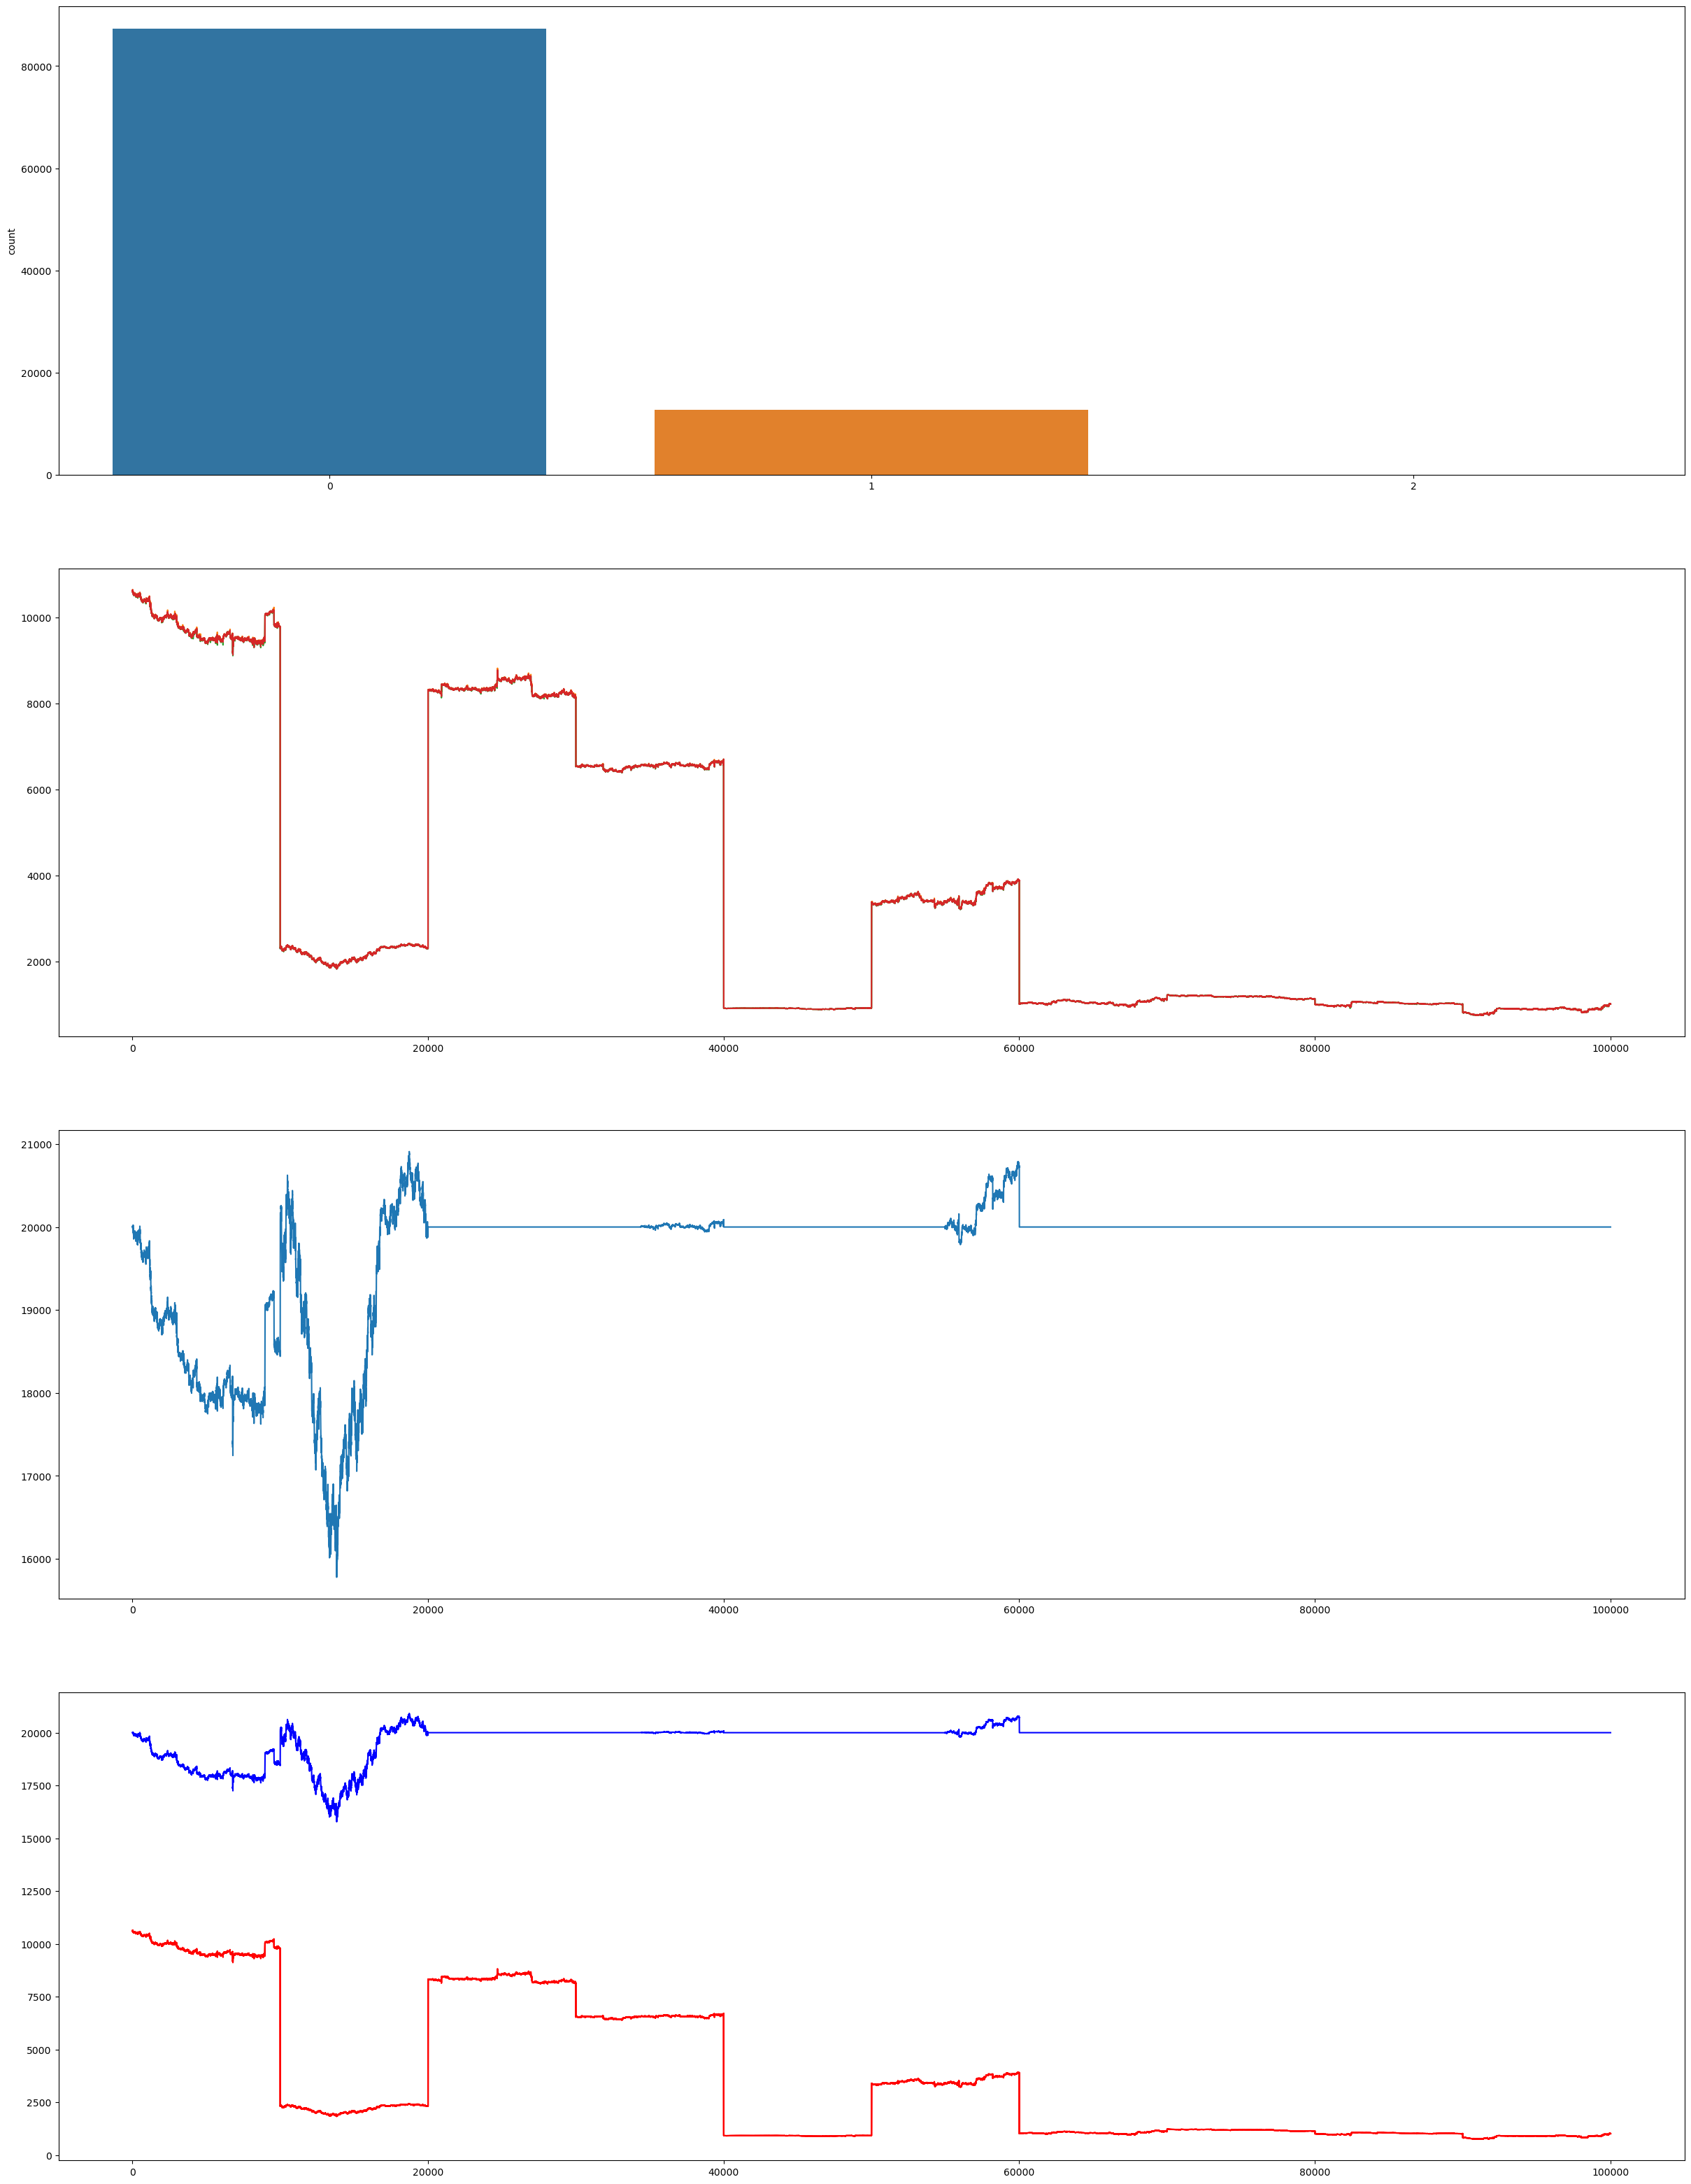

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

class Agent(object):
    def __init__(self, alpha, beta, gamma=0.99, n_actions=3,
                 layer1_size=1024, layer2_size=512, input_dims=8):
        self.gamma = gamma
        self.alpha = alpha
        self.beta = beta
        self.input_dims = input_dims
        self.fc1_dims = layer1_size
        self.fc2_dims = layer2_size
        self.n_actions = n_actions
        # hier nieuw netwerk maken of oude inladen
        self.actor, self.critic, self.policy = self.build_actor_critic_network()
        
        self.action_space = [i for i in range(n_actions)]

    def build_actor_critic_network(self):
        NN_input = Input(shape=(self.input_dims,))
        delta = Input(shape=[1])
        dense1 = Dense(self.fc1_dims, activation='relu')(NN_input)
        dense2 = Dense(self.fc2_dims, activation='relu')(dense1)
        probs = Dense(self.n_actions, activation='softmax')(dense2)
        values = Dense(1, activation='linear')(dense2)

        def custom_loss(y_true, y_pred):
            out = K.clip(y_pred, 1e-8, 1-1e-8)
            log_lik = y_true*K.log(out)

            return K.sum(-log_lik*delta)

        actor = Model(inputs=[NN_input, delta], outputs=[probs])

        actor.compile(optimizer=Adam(lr=self.alpha), loss=custom_loss)

        critic = Model(inputs=[NN_input], outputs=[values])

        critic.compile(optimizer=Adam(lr=self.beta), loss='mean_squared_error')

        policy = Model(inputs=[NN_input], outputs=[probs])

        return actor, critic, policy

    def choose_action(self, observation):
        state = observation[np.newaxis, :]
        probabilities = self.policy.predict(state)[0]
        action = np.random.choice(self.action_space, p=probabilities)

        return action

    def learn(self, state, action, reward, state_, done):
        state = state[np.newaxis,:]
        state_ = state_[np.newaxis,:]
        critic_value_ = self.critic.predict(state_)
        critic_value = self.critic.predict(state)

        target = reward + self.gamma*critic_value_*(1-int(done))
        delta =  target - critic_value

        actions = np.zeros([1, self.n_actions])
        actions[np.arange(1), action] = 1

        self.actor.fit([state, delta], actions, verbose=0)

        self.critic.fit(state, target, verbose=0) 
        
        
        
        
def train():
    agent = Agent(alpha=0.01, beta=0.05)

    env = TradingEnv()
    score_history = []
    worth_history = []
    price_history = []
    steps = []
    num_episodes = 10

    for i in range(num_episodes):
        agent.policy.save('test/policy')
        agent.critic.save('test/critic')
        agent.actor.save('test/actor')

        
        done = False
        score = 0
        observation, done = env.reset()
        observation = np.asarray(observation)
        counter = 0
        while not done:
            counter += 1
            # env.render()
            action = agent.choose_action(observation)
            print("action: ", action ," Episode: ", i, "Step: ", counter, "current_worth: ", env.calc_current_worth())
            steps.append(action)
            observation_, reward, done = env.step(action)
            observation_ = np.asarray(observation_)
            agent.learn(observation, action, reward, observation_, done)
            observation = observation_
            score += reward
            worth_history.append(env.calc_current_worth())
            price_history.append(env.current_price)
            if counter > 10000:
                done = True

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        print('episode: ', i,'worth: %.2f' % env.calc_current_worth(),
              'avg score %.2f' % avg_score)

    #save model progress
    agent.policy.save('test/policy')
    agent.critic.save('test/critic')
    agent.actor.save('test/actor')
    #make axes for 4 plots under eachother

    fig, axs = plt.subplots(4, 1, figsize=(30, 40))
    #plot the price on first axis
    sns.countplot(steps, ax=axs[0])
    #set plotje on first axis
    # sns.lineplot(price_history,ax=axs[3], color="red", label="price")
    # sns.lineplot(worth_history,ax=axs[3], color="blue", label="investment_worth")


    axs[1].plot(price_history)
    axs[2].plot(worth_history)
    axs[3].plot(price_history, color="red", label="price")
    axs[3].plot(worth_history, color="blue", label="investment_worth")
    fig.show()


        

train()


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode:  0 worth: 19470.71 avg score -534.34


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cedri\AppData\Local\Temp\ipykernel_20408\3137943169.py:139: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


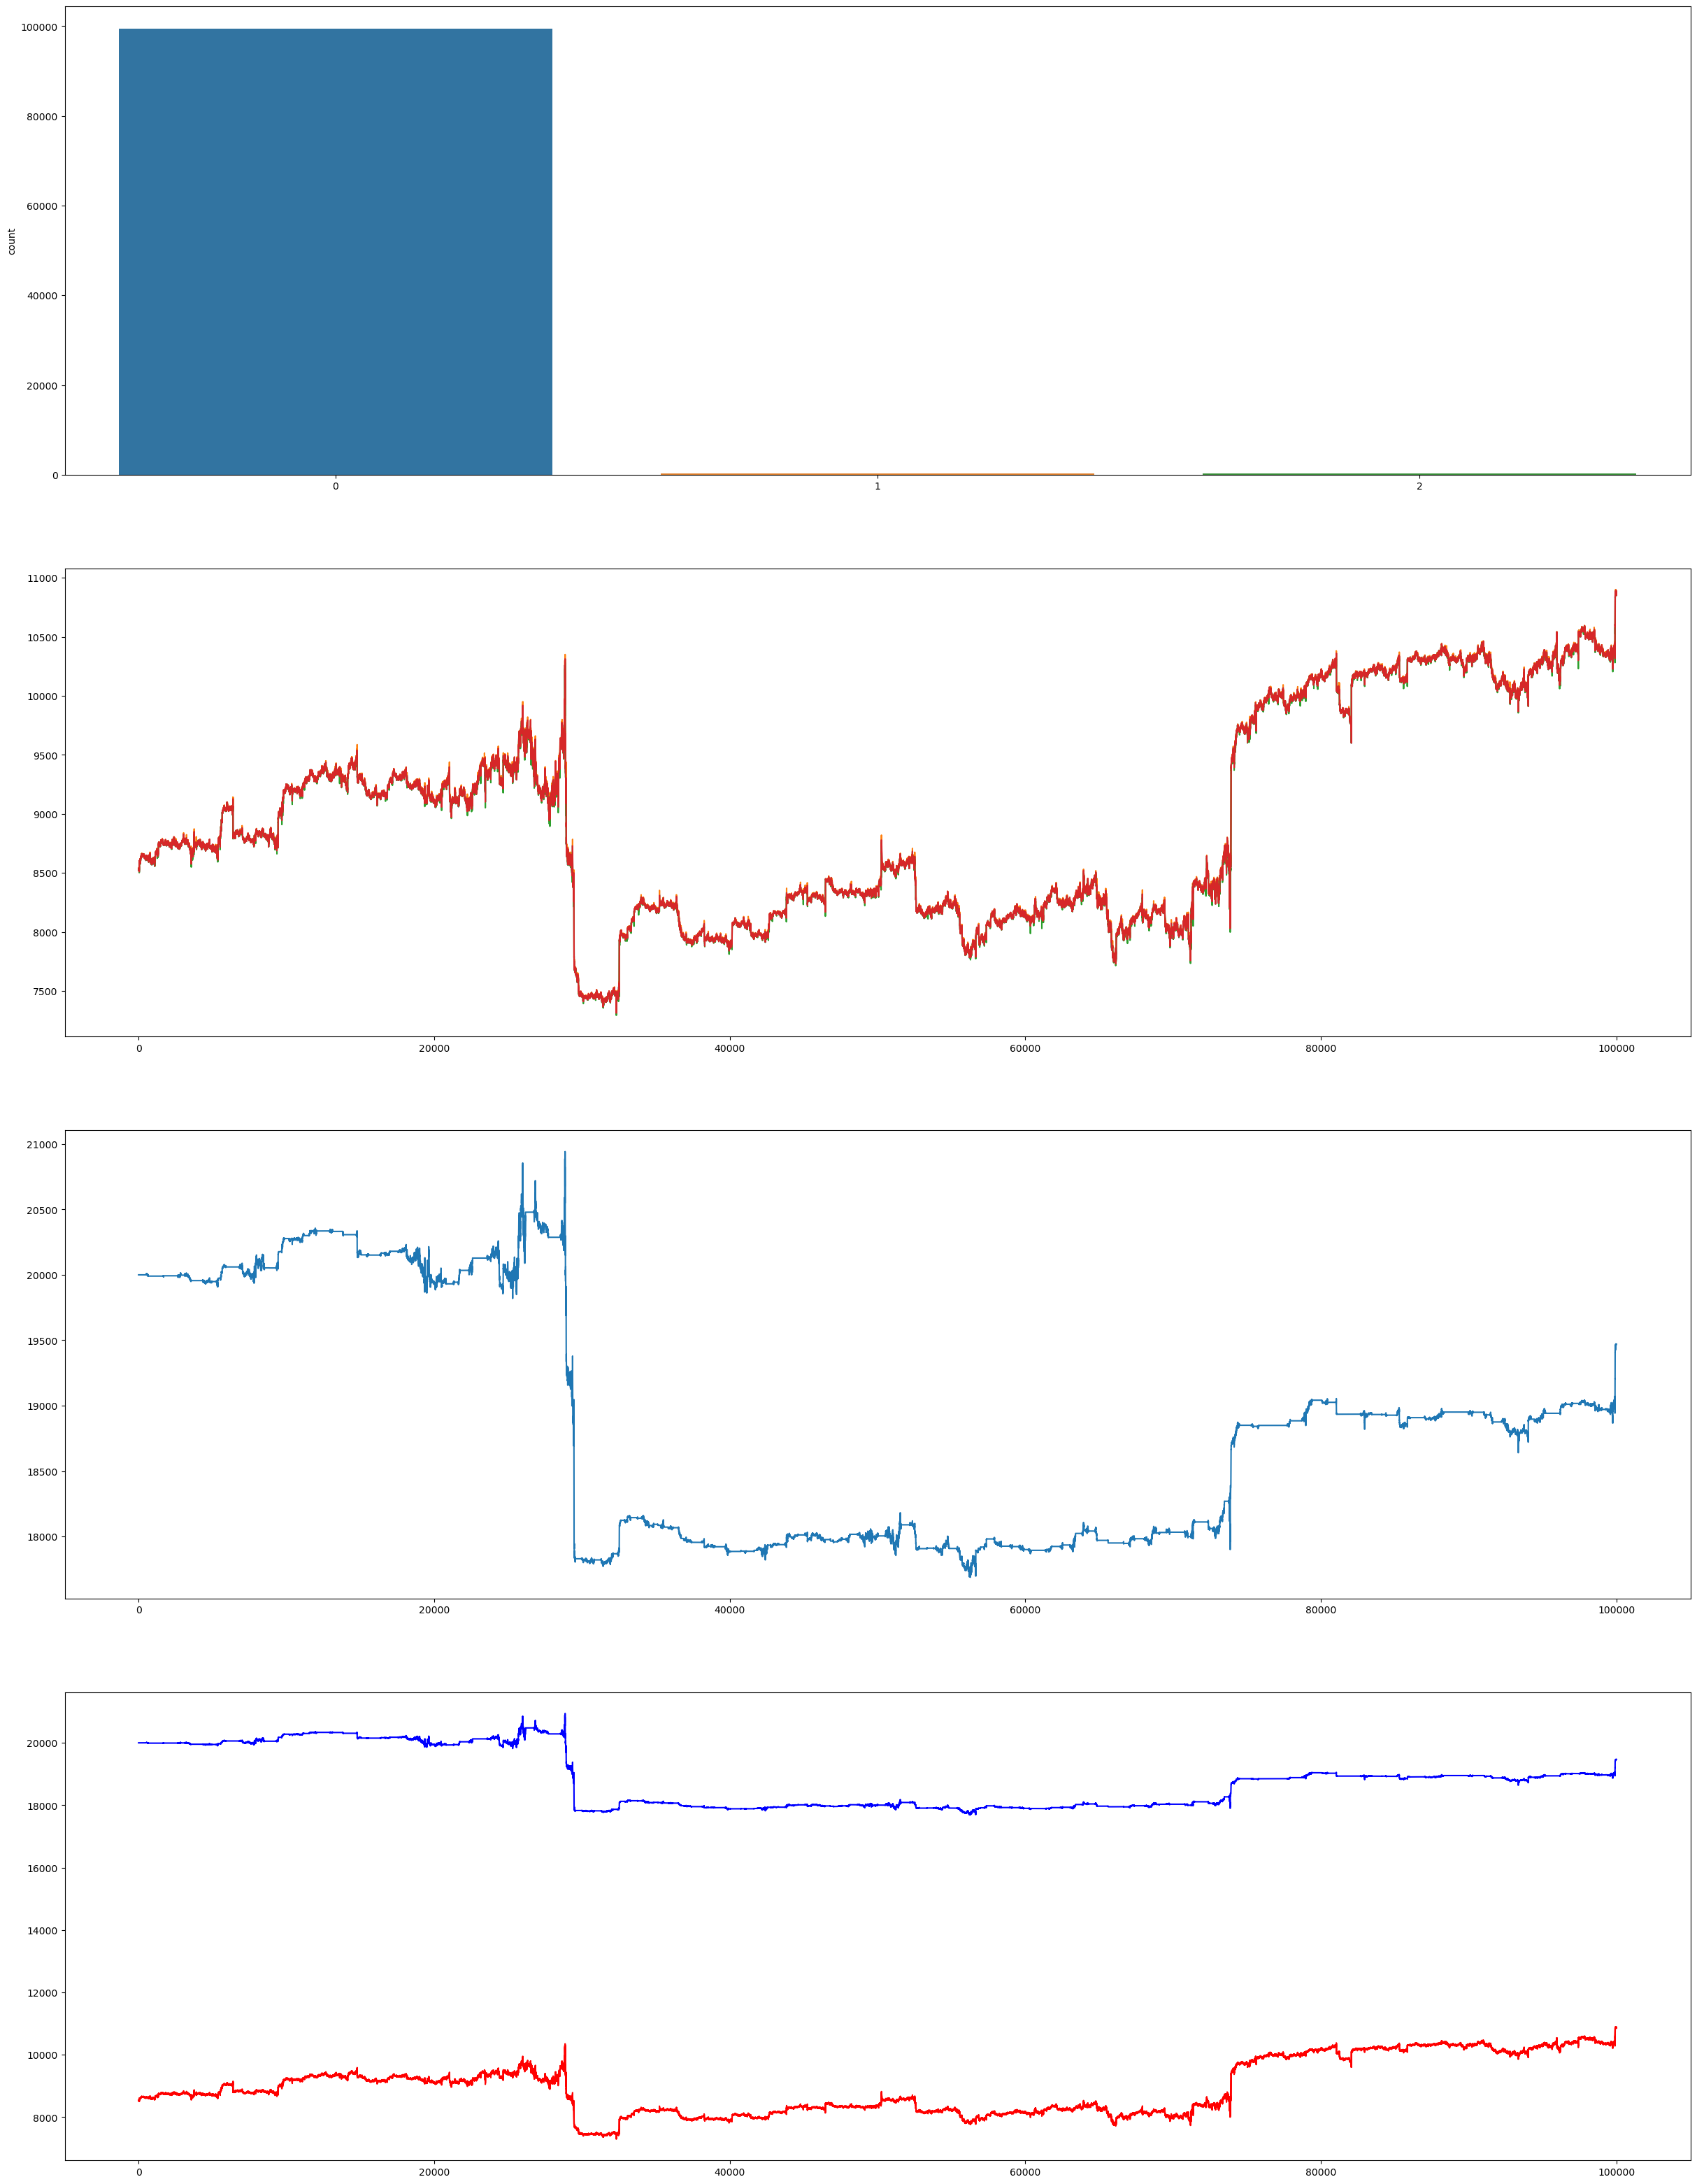

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.generic_utils import get_custom_objects

import keras
class Agent(object):
    def __init__(self, alpha, beta, gamma=0.99, n_actions=3,
                 layer1_size=1024, layer2_size=512, input_dims=8):
        self.gamma = gamma
        self.alpha = alpha
        self.beta = beta
        self.input_dims = input_dims
        self.fc1_dims = layer1_size
        self.fc2_dims = layer2_size
        self.n_actions = n_actions
        # hier nieuw netwerk maken of oude inladen
        # self.actor, self.critic, self.policy = self.build_actor_critic_network()
        self.critic = keras.models.load_model('noLoss/critic')
        self.policy = keras.models.load_model('noLoss/policy')
        self.actor = load_model('noLoss/actor')
        # self.actor = model_from_json(open('test/actor').read())
        # self.actor.load_weights(os.path.join(os.path.dirname('test/actor'), 'model_weights.h5'))
        # self.actor = keras.models.load_model('test/actor')
        self.action_space = [i for i in range(n_actions)]
    def custom_loss(self,y_true, y_pred):
        out = K.clip(y_pred, 1e-8, 1-1e-8)
        log_lik = y_true*K.log(out)
        delta = Input(shape=[1])
        return K.sum(-log_lik* Input(shape=[1]))

    def build_actor_critic_network(self):
        NN_input = Input(shape=(self.input_dims,))
        delta = Input(shape=[1])
        dense1 = Dense(self.fc1_dims, activation='relu')(NN_input)
        dense2 = Dense(self.fc2_dims, activation='relu')(dense1)
        probs = Dense(self.n_actions, activation='softmax')(dense2)
        values = Dense(1, activation='linear')(dense2)

        

        actor = Model(inputs=[NN_input, delta], outputs=[probs])

        actor.compile(optimizer=Adam(lr=self.alpha), loss=self.custom_loss)

        critic = Model(inputs=[NN_input], outputs=[values])

        critic.compile(optimizer=Adam(lr=self.beta), loss='mean_squared_error')

        policy = Model(inputs=[NN_input], outputs=[probs])

        return actor, critic, policy

    def choose_action(self, observation):
        state = observation[np.newaxis, :]
        probabilities = self.policy.predict(state)[0]
        action = np.random.choice(self.action_space, p=probabilities)

        return action

    def learn(self, state, action, reward, state_, done):
        state = state[np.newaxis,:]
        state_ = state_[np.newaxis,:]
        critic_value_ = self.critic.predict(state_)
        critic_value = self.critic.predict(state)

        target = reward + self.gamma*critic_value_*(1-int(done))
        delta =  target - critic_value

        actions = np.zeros([1, self.n_actions])
        actions[np.arange(1), action] = 1

        self.actor.fit([state, delta], actions, verbose=0)

        self.critic.fit(state, target, verbose=0) 
        
        
        
        
def train():
    agent = Agent(alpha=0.01, beta=0.05)

    env = TradingEnv()
    score_history = []
    worth_history = []
    price_history = []
    steps = []
    bought = []
    sold = []
    num_episodes = 1

    for i in range(num_episodes):
        # agent.policy.save('test/policy')
        # agent.critic.save('test/critic')
        # agent.actor.save('test/actor')

        
        done = False
        score = 0
        observation, done = env.reset()
        observation = np.asarray(observation)
        counter = 0
        while not done:
            counter += 1
            # env.render()
            action = agent.choose_action(observation)
            if action == 1:
                bought.append(counter)
            elif action == 2:
                sold.append(counter)
            # print("action: ", action ," Episode: ", i, "Step: ", counter, "current_worth: ", env.calc_current_worth())
            steps.append(action)
            observation_, reward, done = env.step(action)
            observation_ = np.asarray(observation_)
            agent.learn(observation, action, reward, observation_, done)
            observation = observation_
            score += reward
            worth_history.append(env.calc_current_worth())
            price_history.append(env.current_price)
            if counter > 100000:
                done = True

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        print('episode: ', i,'worth: %.2f' % env.calc_current_worth(),
              'avg score %.2f' % avg_score)

    #save model progress
    # agent.policy.save('test/policy')
    # agent.critic.save('test/critic')
    # agent.actor.save('test/actor')
    #make axes for 4 plots under eachother

    fig, axs = plt.subplots(5, 1, figsize=(30, 40))
    #plot the price on first axis
    plot = sns.countplot(steps, ax=axs[0])
    plot.bar_label(plot.containers[0])
    #set plotje on first axis
    # sns.lineplot(price_history,ax=axs[3], color="red", label="price")
    # sns.lineplot(worth_history,ax=axs[3], color="blue", label="investment_worth")


    axs[1].plot(price_history)
    axs[2].plot(worth_history)
    axs[3].plot(price_history, color="red", label="price")
    axs[3].plot(worth_history, color="blue", label="investment_worth")
    axs[4].plot(price_history, color="red", label="price")
    axs[4].plot(worth_history, color="blue", label="investment_worth")
    axs[4].plot(bought, [price_history[i] for i in bought], 'o', color='green', label="bought")
    axs[4].plot(sold, [price_history[i] for i in sold], 'o', color='black', label="sold")
    fig.show()


        

train()


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


action:  current_amount  0 curent_investment  0 current_price  [8199.99 8199.99 8199.99 8199.99] 2  Episode:  0 Step:  211 current_worth:  20000.0
action:  current_amount  0 curent_investment  0 current_price  [8168.27 8168.33 8168.18 8168.33] 2  Episode:  0 Step:  346 current_worth:  20000.0
action:  current_amount  0 curent_investment  0 current_price  [8126.12 8126.56 8117.0 8120.91] 1  Episode:  0 Step:  412 current_worth:  20000.0
action:  current_amount  0.4922398389391247 curent_investment  4000.0 current_price  [8203.34 8218.0 8200.79 8217.93] 1  Episode:  0 Step:  776 current_worth:  20038.01076036288
action:  current_amount  0.8823248530918966 curent_investment  7200.0 current_price  [8173.07 8186.95 8173.07 8186.46] 1  Episode:  0 Step:  1069 current_worth:  20011.302787059787
action:  current_amount  1.1955486478226405 curent_investment  9760.0 current_price  [8209.21 8209.21 8192.19 8192.3] 1  Episode:  0 Step:  1156 current_worth:  20054.509915192095
action:  current_amou

c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cedri\AppData\Local\Temp\ipykernel_20408\793516745.py:136: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


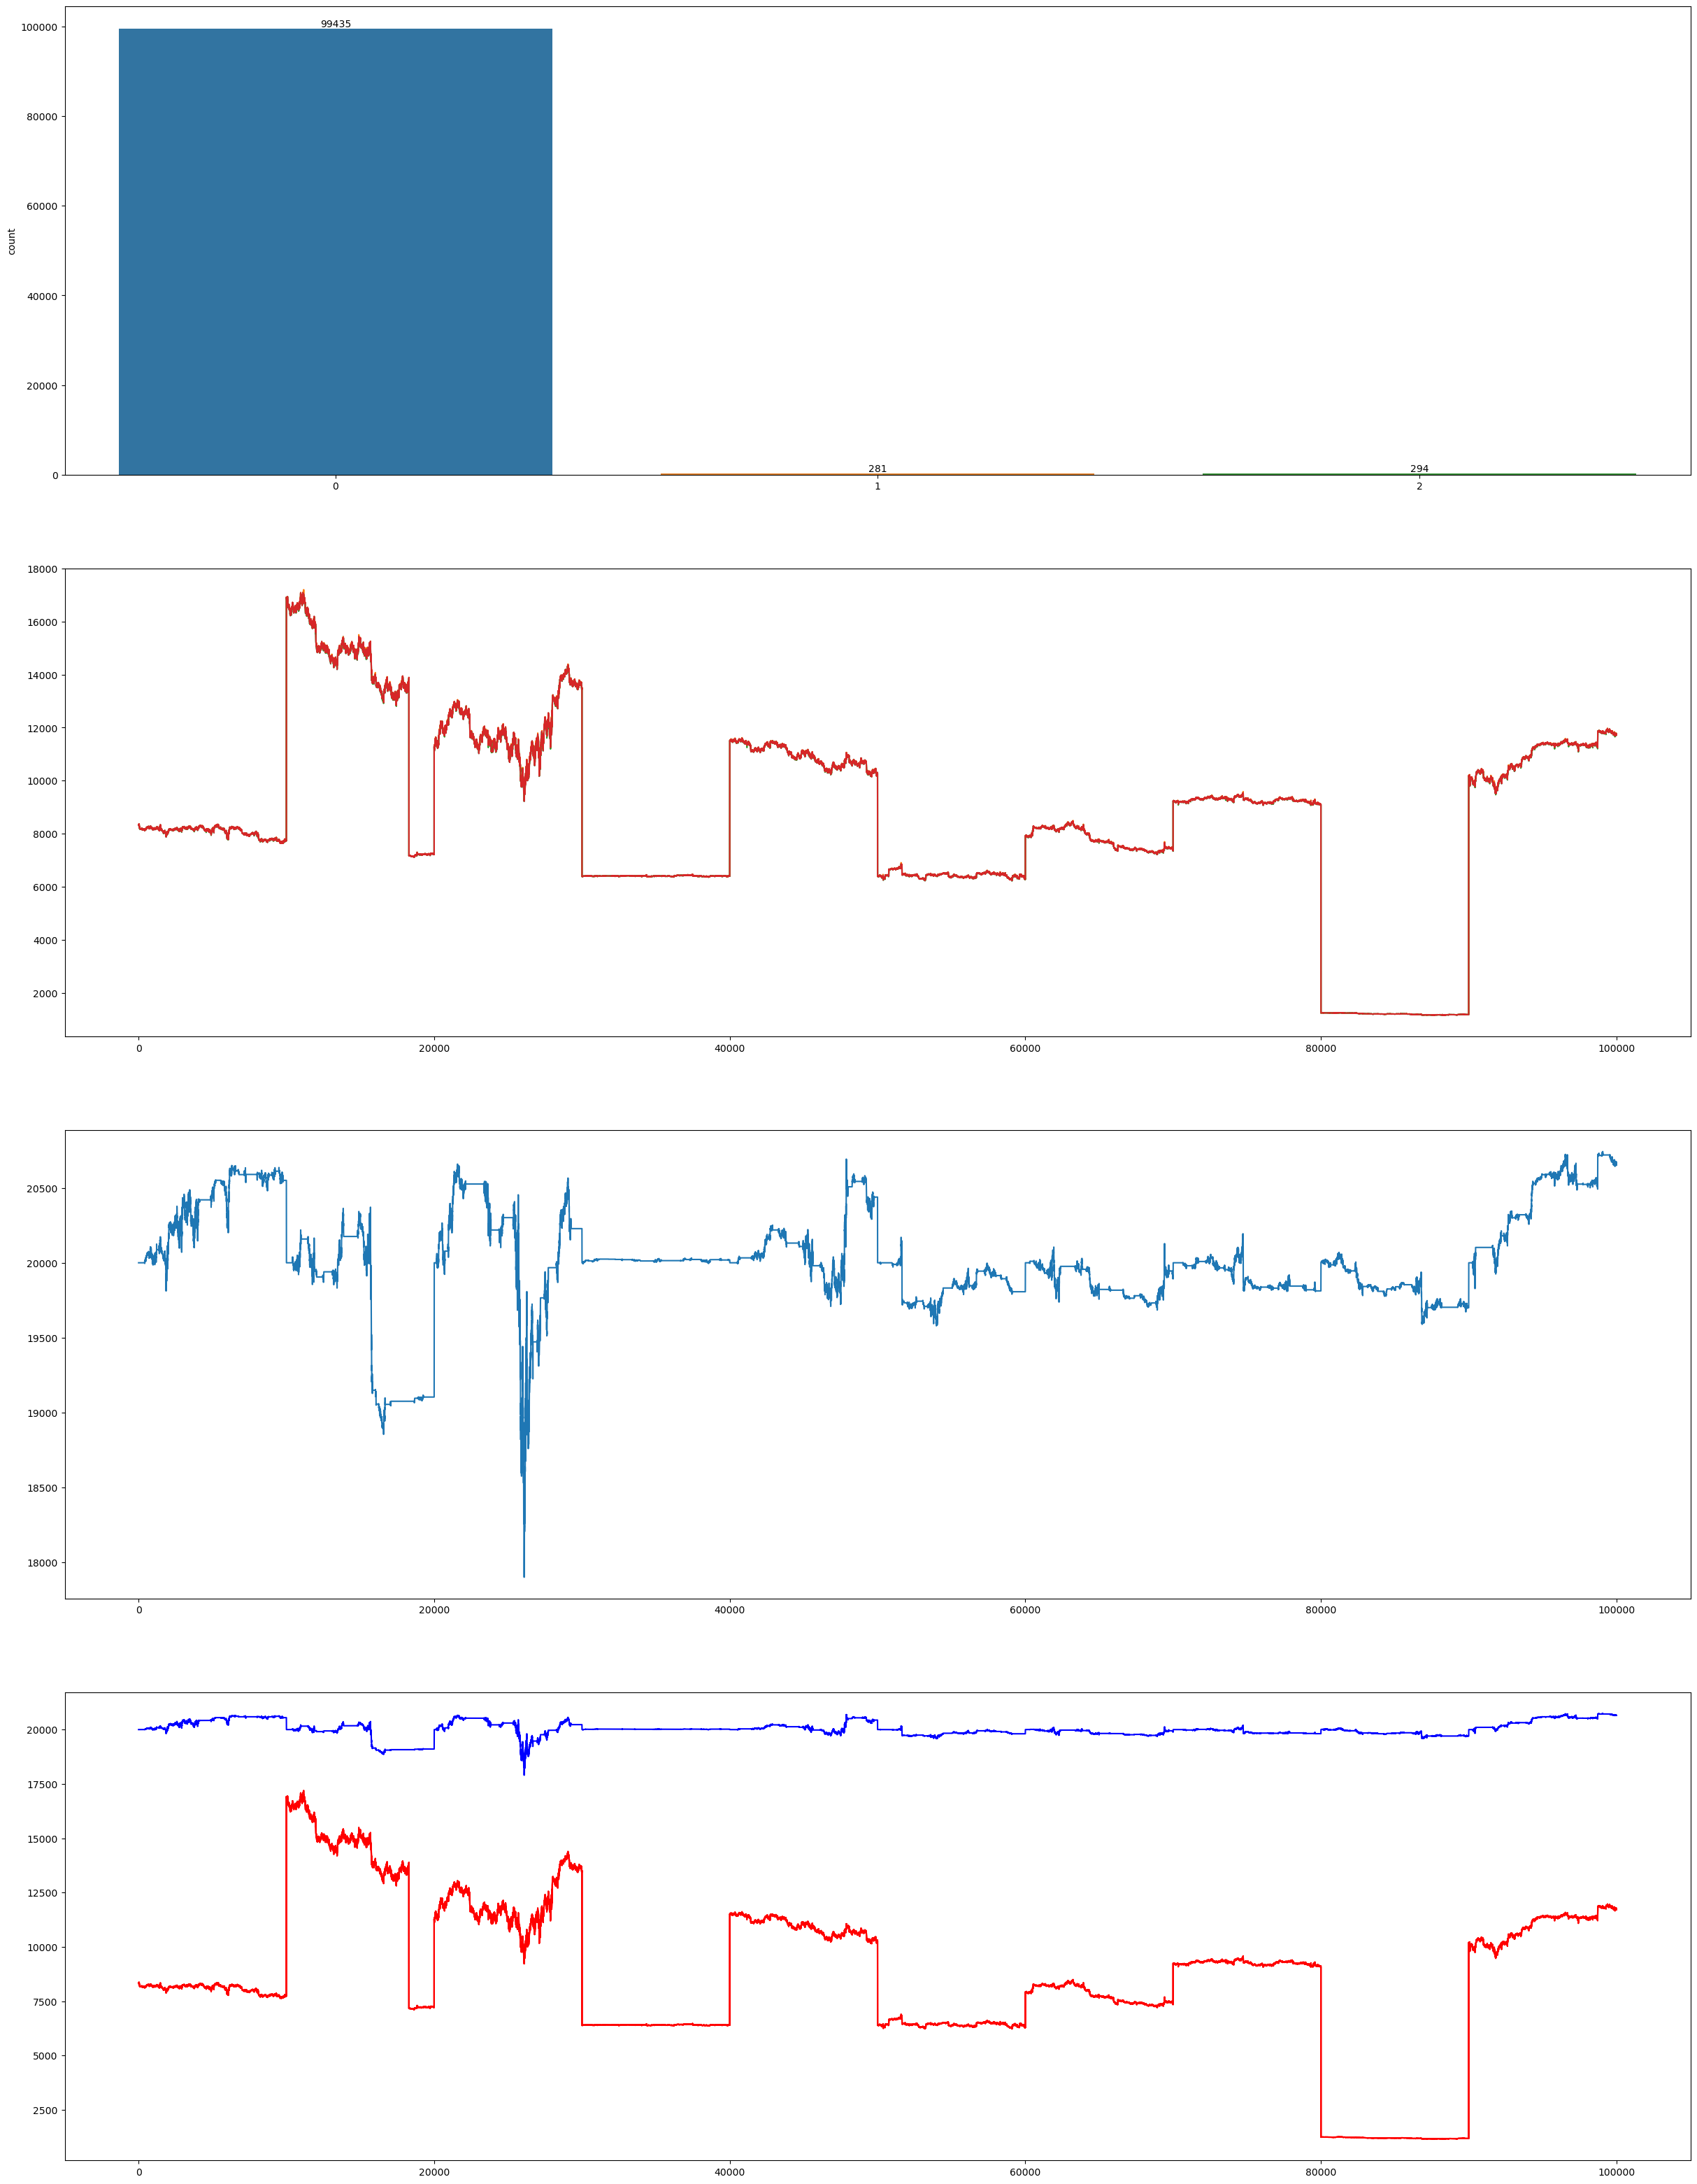

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

class Agent(object):
    def __init__(self, alpha, beta, gamma=0.99, n_actions=3,
                 layer1_size=1024, layer2_size=512, input_dims=8):
        self.gamma = gamma
        self.alpha = alpha
        self.beta = beta
        self.input_dims = input_dims
        self.fc1_dims = layer1_size
        self.fc2_dims = layer2_size
        self.n_actions = n_actions
        # hier nieuw netwerk maken of oude inladen
        # self.actor, self.critic, self.policy = self.build_actor_critic_network()
        self.critic = keras.models.load_model('noLoss/critic')
        self.policy = keras.models.load_model('noLoss/policy')
        self.actor = load_model('noLoss/actor')
        self.action_space = [i for i in range(n_actions)]

    def build_actor_critic_network(self):
        NN_input = Input(shape=(self.input_dims,))
        delta = Input(shape=[1])
        dense1 = Dense(self.fc1_dims, activation='relu')(NN_input)
        dense2 = Dense(self.fc2_dims, activation='relu')(dense1)
        probs = Dense(self.n_actions, activation='softmax')(dense2)
        values = Dense(1, activation='linear')(dense2)

        # def custom_loss(y_true, y_pred):
        #     out = K.clip(y_pred, 1e-8, 1-1e-8)
        #     log_lik = y_true*K.log(out)

        #     return K.sum(-log_lik*delta)

        actor = Model(inputs=[NN_input, delta], outputs=[probs])

        actor.compile(optimizer=Adam(lr=self.alpha), loss='categorical_crossentropy')

        critic = Model(inputs=[NN_input], outputs=[values])

        critic.compile(optimizer=Adam(lr=self.beta), loss='mean_squared_error')

        policy = Model(inputs=[NN_input], outputs=[probs])

        return actor, critic, policy

    def choose_action(self, observation):
        state = observation[np.newaxis, :]
        probabilities = self.policy.predict(state)[0]
        action = np.random.choice(self.action_space, p=probabilities)

        return action

    def learn(self, state, action, reward, state_, done):
        state = state[np.newaxis,:]
        state_ = state_[np.newaxis,:]
        critic_value_ = self.critic.predict(state_)
        critic_value = self.critic.predict(state)

        target = reward + self.gamma*critic_value_*(1-int(done))
        delta =  target - critic_value

        actions = np.zeros([1, self.n_actions])
        actions[np.arange(1), action] = 1

        self.actor.fit([state, delta], actions, verbose=0)

        self.critic.fit(state, target, verbose=0) 
        
        
        
        
def train():
    agent = Agent(alpha=0.01, beta=0.05)

    env = TradingEnv()
    score_history = []
    worth_history = []
    price_history = []
    steps = []
    num_episodes = 10

    for i in range(num_episodes):
        agent.policy.save('noLoss/policy')
        agent.critic.save('noLoss/critic')
        agent.actor.save('noLoss/actor')

        
        done = False
        score = 0
        observation, done = env.reset()
        observation = np.asarray(observation)
        counter = 0
        while not done:
            counter += 1
            # env.render()
            action = agent.choose_action(observation)
            if action == 2 or action == 1: 
                print("action: ",action ," Episode: ", i, "Step: ", counter, "current_worth: ", env.calc_current_worth(),"current_amount ", env.invested_amount,"curent_investment ", env.invested,"current_price " , env.current_price )
            steps.append(action)
            observation_, reward, done = env.step(action)
            observation_ = np.asarray(observation_)
            agent.learn(observation, action, reward, observation_, done)
            observation = observation_
            score += reward
            worth_history.append(env.calc_current_worth())
            price_history.append(env.current_price)
            if counter > 10000:
                done = True

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        print('episode: ', i,'worth: %.2f' % env.calc_current_worth(),
              'avg score %.2f' % avg_score)

    #save model progress
    agent.policy.save('noLoss/policy')
    agent.critic.save('noLoss/critic')
    agent.actor.save('noLoss/actor')
    #make axes for 4 plots under eachother

    fig, axs = plt.subplots(4, 1, figsize=(30, 40))
    #plot the price on first axis
    plot = sns.countplot(steps, ax=axs[0])
    plot.bar_label(plot.containers[0])
    # plot.show()
    #set plotje on first axis
    # sns.lineplot(price_history,ax=axs[3], color="red", label="price")
    # sns.lineplot(worth_history,ax=axs[3], color="blue", label="investment_worth")


    axs[1].plot(price_history)
    axs[2].plot(worth_history)
    axs[3].plot(price_history, color="red", label="price")
    axs[3].plot(worth_history, color="blue", label="investment_worth")
    fig.show()


        

train()


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode:  0 worth: 19333.70 avg score -666.30
episode:  1 worth: 20239.52 avg score -237.48
episode:  2 worth: 21316.76 avg score 280.60
episode:  3 worth: 19989.82 avg score 207.91


c:\Users\cedri\anaconda3\envs\backupenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cedri\AppData\Local\Temp\ipykernel_20408\684309236.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


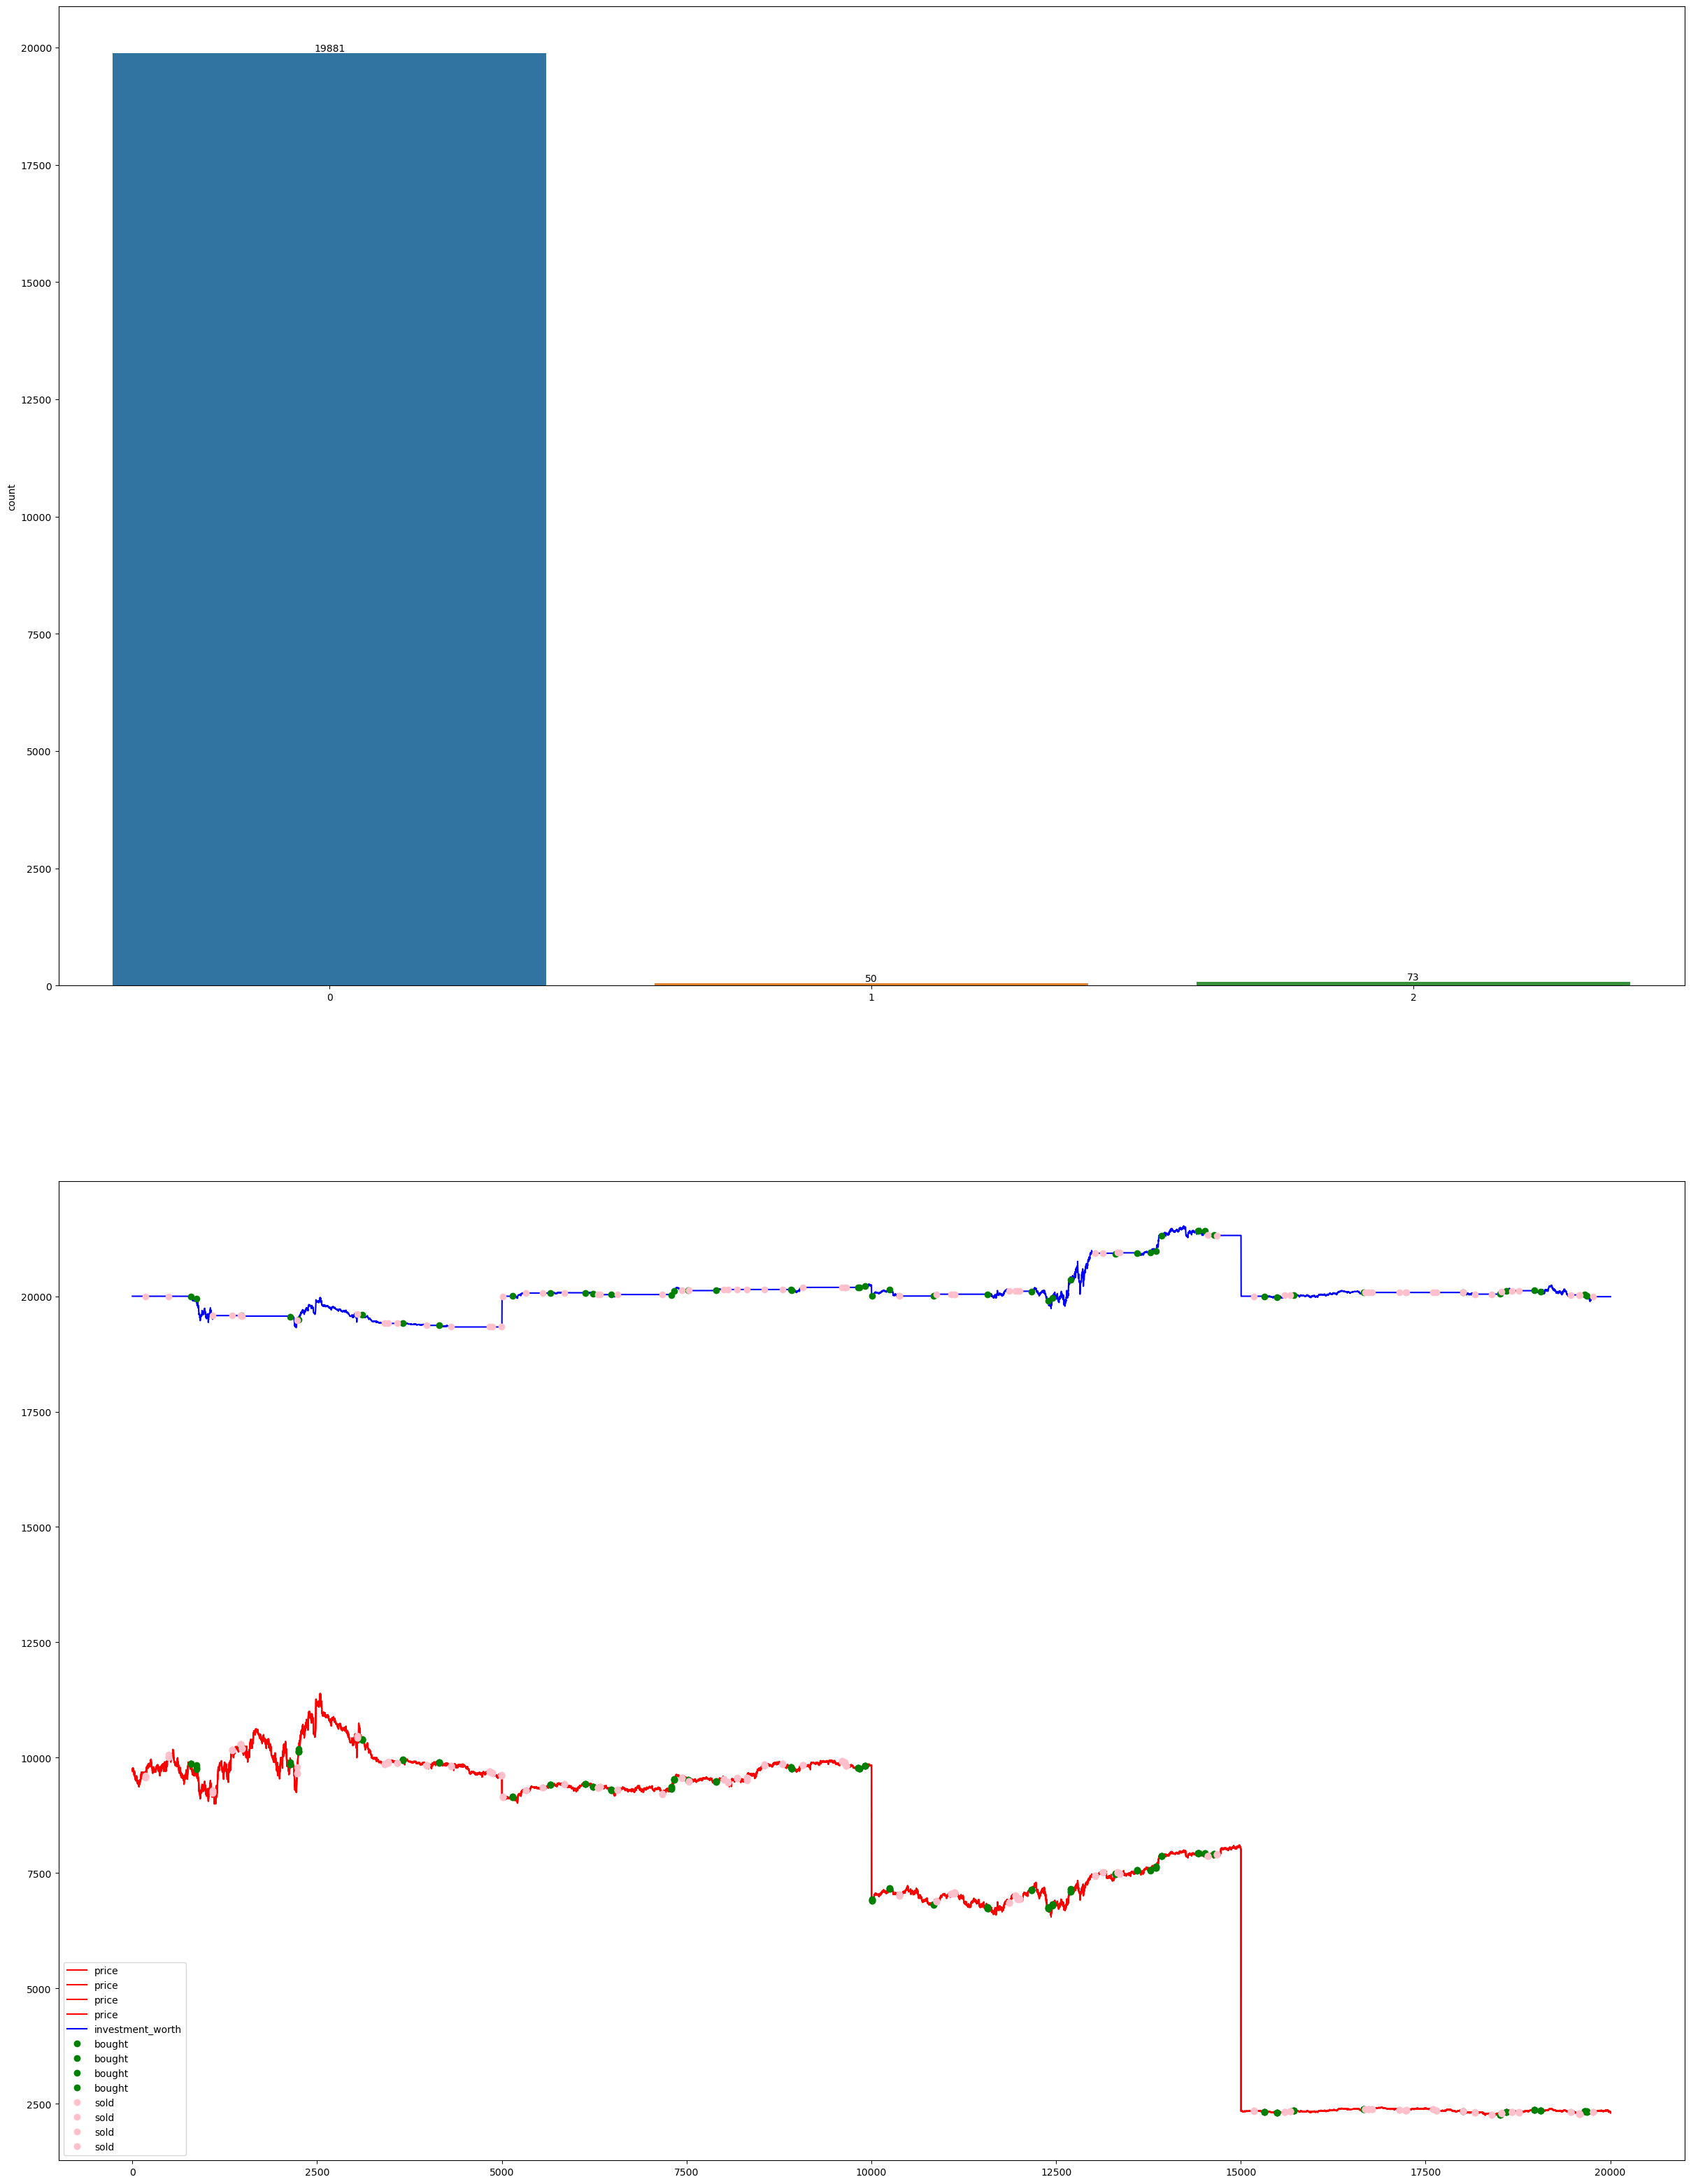

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.generic_utils import get_custom_objects

import keras
class Agent(object):
    def __init__(self, alpha, beta, gamma=0.99, n_actions=3,
                 layer1_size=1024, layer2_size=512, input_dims=8):
        self.gamma = gamma
        self.alpha = alpha
        self.beta = beta
        self.input_dims = input_dims
        self.fc1_dims = layer1_size
        self.fc2_dims = layer2_size
        self.n_actions = n_actions
        # hier nieuw netwerk maken of oude inladen
        # self.actor, self.critic, self.policy = self.build_actor_critic_network()
        self.critic = keras.models.load_model('noLoss/critic')
        self.policy = keras.models.load_model('noLoss/policy')
        self.actor = load_model('noLoss/actor')
        # self.actor = model_from_json(open('test/actor').read())
        # self.actor.load_weights(os.path.join(os.path.dirname('test/actor'), 'model_weights.h5'))
        # self.actor = keras.models.load_model('test/actor')
        self.action_space = [i for i in range(n_actions)]
    def custom_loss(self,y_true, y_pred):
        out = K.clip(y_pred, 1e-8, 1-1e-8)
        log_lik = y_true*K.log(out)
        delta = Input(shape=[1])
        return K.sum(-log_lik* Input(shape=[1]))

    def build_actor_critic_network(self):
        NN_input = Input(shape=(self.input_dims,))
        delta = Input(shape=[1])
        dense1 = Dense(self.fc1_dims, activation='relu')(NN_input)
        dense2 = Dense(self.fc2_dims, activation='relu')(dense1)
        probs = Dense(self.n_actions, activation='softmax')(dense2)
        values = Dense(1, activation='linear')(dense2)

        

        actor = Model(inputs=[NN_input, delta], outputs=[probs])

        actor.compile(optimizer=Adam(lr=self.alpha), loss=self.custom_loss)

        critic = Model(inputs=[NN_input], outputs=[values])

        critic.compile(optimizer=Adam(lr=self.beta), loss='mean_squared_error')

        policy = Model(inputs=[NN_input], outputs=[probs])

        return actor, critic, policy

    def choose_action(self, observation):
        state = observation[np.newaxis, :]
        probabilities = self.policy.predict(state)[0]
        action = np.random.choice(self.action_space, p=probabilities)

        return action

    def learn(self, state, action, reward, state_, done):
        state = state[np.newaxis,:]
        state_ = state_[np.newaxis,:]
        critic_value_ = self.critic.predict(state_)
        critic_value = self.critic.predict(state)

        target = reward + self.gamma*critic_value_*(1-int(done))
        delta =  target - critic_value

        actions = np.zeros([1, self.n_actions])
        actions[np.arange(1), action] = 1

        self.actor.fit([state, delta], actions, verbose=0)

        self.critic.fit(state, target, verbose=0) 
        
        
        
        
def train():
    agent = Agent(alpha=0.01, beta=0.05)

    env = TradingEnv()
    score_history = []
    worth_history = []
    price_history = []
    steps = []
    bought = []
    sold = []
    num_episodes = 4
    fullcounter = 0

    for i in range(num_episodes):
        agent.policy.save('test/policy')
        agent.critic.save('test/critic')
        agent.actor.save('test/actor')

        
        done = False
        score = 0
        observation, done = env.reset()
        observation = np.asarray(observation)
        counter = 0
        while not done:
            counter += 1
            fullcounter += 1
            # env.render()
            action = agent.choose_action(observation)
            if action == 1:
                bought.append(fullcounter-1)
            elif action == 2:
                sold.append(fullcounter-1)
            # print("action: ", action ," Episode: ", i, "Step: ", counter, "current_worth: ", env.calc_current_worth())
            steps.append(action)
            observation_, reward, done = env.step(action)
            observation_ = np.asarray(observation_)
            agent.learn(observation, action, reward, observation_, done)
            observation = observation_
            score += reward
            worth_history.append(env.calc_current_worth())
            price_history.append(env.current_price)
            if counter > 5000:
                done = True

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        print('episode: ', i,'worth: %.2f' % env.calc_current_worth(),
              'avg score %.2f' % avg_score)

    # save model progress
    agent.policy.save('test/policy')
    agent.critic.save('test/critic')
    agent.actor.save('test/actor')
    #make axes for 4 plots under eachother

    fig, axs = plt.subplots(2, 1, figsize=(30, 40))
    #plot the price on first axis
    plot = sns.countplot(steps, ax=axs[0])
    plot.bar_label(plot.containers[0])
    #set plotje on first axis
    # sns.lineplot(price_history,ax=axs[3], color="red", label="price")
    # sns.lineplot(worth_history,ax=axs[3], color="blue", label="investment_worth")


    # axs[1].plot(price_history)


    axs[1].plot(price_history, color="red", label="price")
    axs[1].plot(worth_history, color="blue", label="investment_worth")
    #print shapes of bought and sold worth_history and price_history
    if len(bought) > 0:
        axs[1].plot(bought, [worth_history[i] for i in bought], 'o', color='green')
        axs[1].plot(bought, [price_history[i] for i in bought], 'o', color='green', label="bought")
    if len(sold) > 0:
        axs[1].plot(sold, [worth_history[i] for i in sold], 'o', color='pink')
        axs[1].plot(sold, [price_history[i] for i in sold], 'o', color='pink', label="sold")

    axs[1].legend()
    fig.show()


        

train()
